$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 1 $$

# `01` Assignment 01
- Design your own simple ANN,(one perceptron with one input layer
and one output neuron)
- Use the data points listed in the adjacent Table as your training data.
- Assume the activation function is sigmoid.
- Assume there is no bias for simplicity (b=0).
- Test your design using different iteration numbers.


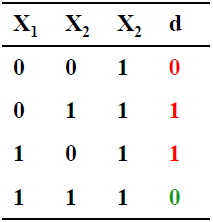

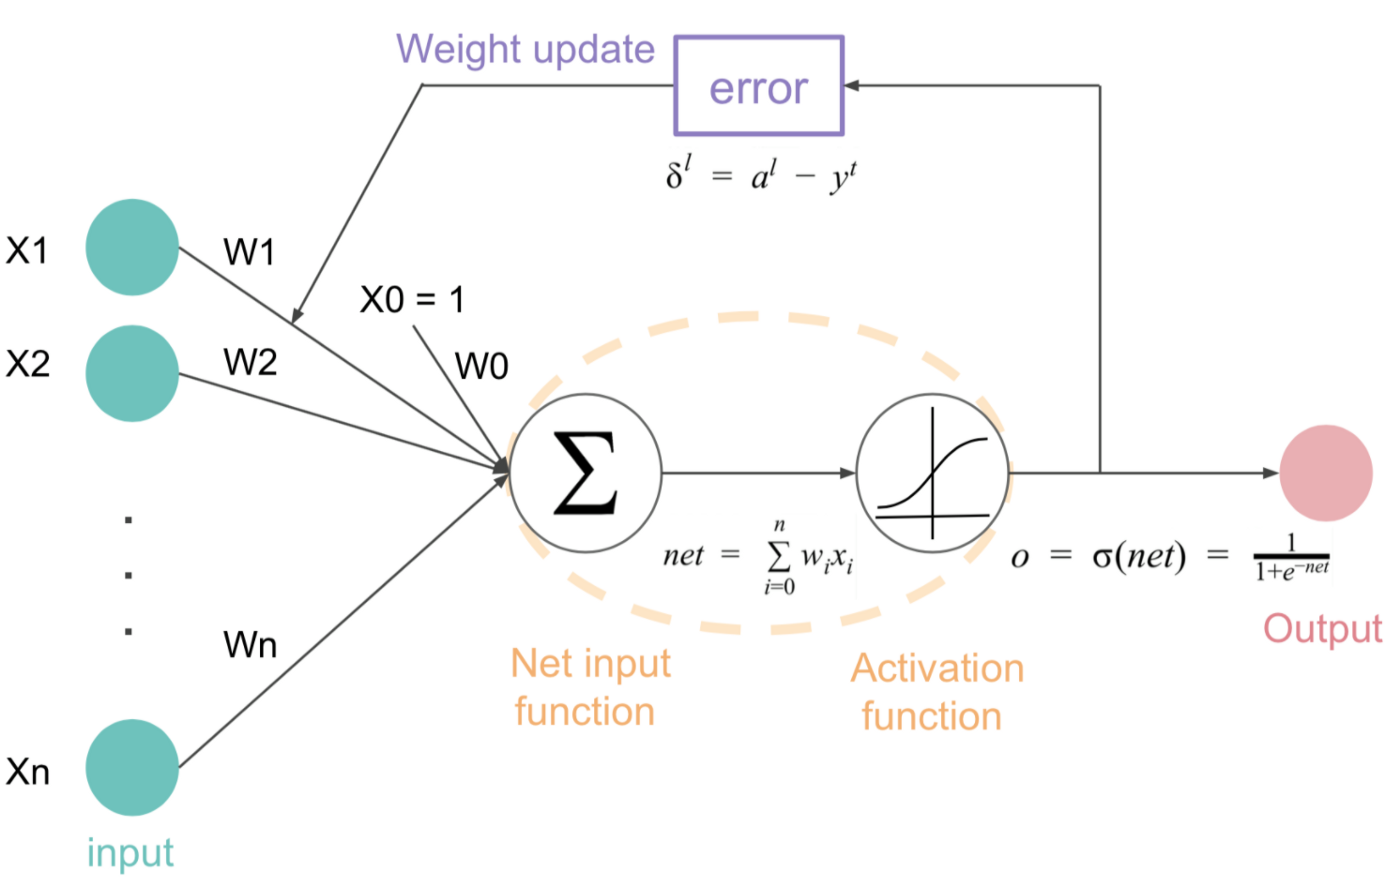

## `i` Implementation

In [ ]:
import numpy as np

np.random.seed = 42

In [ ]:
class ANN:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.y_pred = np.zeros_like(y)
        self.weights = np.random.rand(X.shape[1], 1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, p):
        return p * (1 - p)

    def feedforward(self):
        z = self.X @ self.weights
        self.y_pred = self.sigmoid(z)
        return self.y_pred

    def backprop(self):
        error = self.y - self.y_pred
        delta = error * self.sigmoid_derivative(self.y_pred)
        self.weights += self.X.T @ delta

    def fit(self, iterations, learning_rate=0.1, verbose=1):
        for i in range(iterations):
            self.y_pred = self.feedforward()
            self.backprop()
            if verbose:
                if i % 100 == 0:
                    print(f"Iteration {i} ===============================")
                    print("y_Actual: ")
                    print(self.y)
                    print("y_Predicted: ")
                    print(self.y_pred)
                    loss = np.mean(np.abs(self.y - self.y_pred))
                    print(f"Loss: {loss}")



## `ii` Testing

In [ ]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
model = ANN(X, y)
model.fit(iterations=1000, verbose=1)

Iteration 0 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.53866345]
 [0.79715775]
 [0.7060931 ]
 [0.65635736]]
Loss: 0.4229424915013821
Iteration 100 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.1113399 ]
 [0.910141  ]
 [0.92778685]
 [0.08989242]]
Loss: 0.09082611423508216
Iteration 200 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.07588402]
 [0.93859962]
 [0.95078999]
 [0.06100498]]
Loss: 0.06187484668680347
Iteration 300 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.06074406]
 [0.9507806 ]
 [0.96050782]
 [0.04885625]]
Loss: 0.049577971966055304
Iteration 400 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.05194455]
 [0.95787225]
 [0.96615465]
 [0.04181641]]
Loss: 0.042433513528512504
Iteration 500 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.046046

In [ ]:
model = ANN(X, y)
model.fit(iterations=1000, verbose=1)

Iteration 0 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.58507822]
 [0.77775605]
 [0.72067949]
 [0.65666292]]
Loss: 0.4358263995144026
Iteration 100 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.11306155]
 [0.90903462]
 [0.92808763]
 [0.08983781]]
Loss: 0.0914442772488783
Iteration 200 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.07647103]
 [0.93822183]
 [0.95089576]
 [0.06097873]]
Loss: 0.06208304313993819
Iteration 300 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.06105555]
 [0.95058011]
 [0.96056544]
 [0.04884002]]
Loss: 0.049687506982677265
Iteration 400 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.05214344]
 [0.95774427]
 [0.96619219]
 [0.04180502]]
Loss: 0.04250300197130961
Iteration 500 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.04618722

----

# `02` Assignment 02
- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

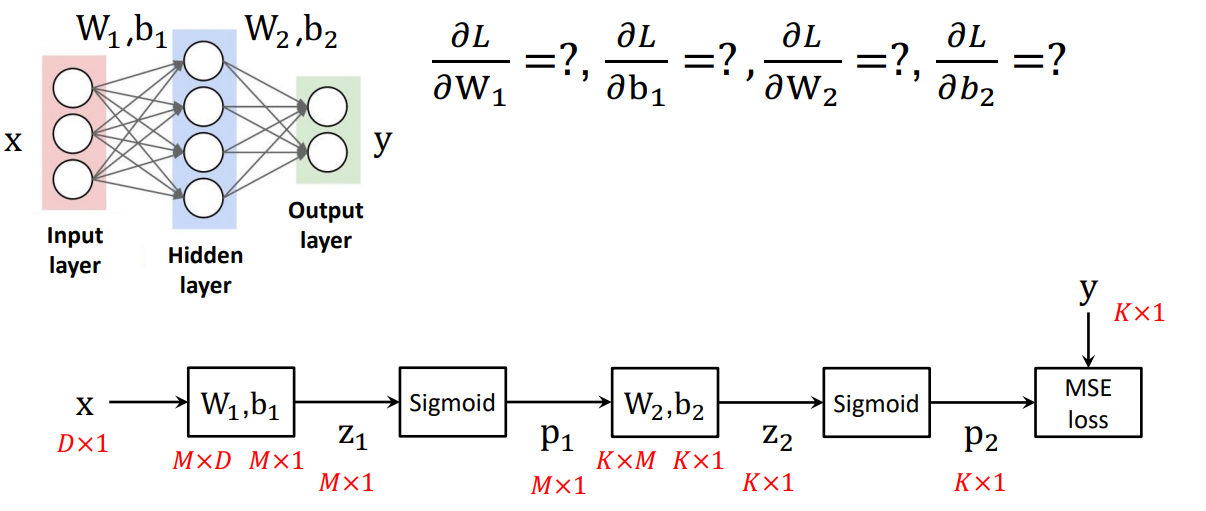

## `i` Implementation

In [ ]:
class ANN:
    def __init__(self, X, y, num_hidden_nodes):
        self.X = X
        self.y = y
        self.y_pred = np.zeros_like(y)
        self.weights_input_hidden = np.random.rand(X.shape[1], num_hidden_nodes)
        self.weights_hidden_output = np.random.rand(num_hidden_nodes, 1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, p):
        return p * (1 - p)

    def feedforward(self):

        self.hidden_layer_input = self.X @ self.weights_input_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = self.hidden_layer_output @ self.weights_hidden_output
        self.y_pred = self.sigmoid(self.output_layer_input)

        return self.y_pred

    def backprop(self):
        output_error = self.y - self.y_pred
        output_delta = output_error * self.sigmoid_derivative(self.y_pred)
        self.weights_hidden_output += self.hidden_layer_output.T @ output_delta

        hidden_error = output_delta @ self.weights_hidden_output.T
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)
        self.weights_input_hidden += self.X.T @ hidden_delta

    def fit(self, iterations, learning_rate=0.1, verbose=1):
        for i in range(iterations):
            self.y_pred = self.feedforward()
            self.backprop()
            if verbose:
                if i % 100 == 0:
                    print(f"Iteration {i} ===============================")
                    print("y_Actual: ")
                    print(self.y)
                    print("y_Predicted: ")
                    print(self.y_pred)
                    loss = np.mean(np.abs(self.y - self.y_pred))
                    print(f"Loss: {loss}")

## `ii` Testing

In [ ]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

Iteration 0 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.90685168]
 [0.95187076]
 [0.93192277]
 [0.93759241]]
Loss: 0.49016264019985695
Iteration 100 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.11293891]
 [0.89286778]
 [0.92414799]
 [0.08783601]]
Loss: 0.09593978820828196
Iteration 200 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.05398157]
 [0.94873334]
 [0.96244514]
 [0.04322826]]
Loss: 0.04650783879885045
Iteration 300 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.03857416]
 [0.96332343]
 [0.97258263]
 [0.03137598]]
Loss: 0.03351101985062248
Iteration 400 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.03110287]
 [0.97039948]
 [0.97758845]
 [0.02553827]]
Loss: 0.027163302837258603
Iteration 500 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.026565

In [ ]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

Iteration 0 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0. 0. 0. 0.]
Loss: 
0.5


Iteration 100 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.05656498 0.94819957 0.95836595 0.04626216]
Loss: 
0.002439115645221845


Iteration 200 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.03383028 0.96893563 0.97482231 0.0278645 ]
Loss: 
0.000879957370796992


Iteration 300 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.02585985 0.97621884 0.98063297 0.0213894 ]
Loss: 
0.0005167158349405886


Iteration 400 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.02156481 0.98014706 0.98378284 0.01788724]
Loss: 
0.0003605326040343141


Iteration 500 ==================================================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.01880431 0.98267343 0.98581647 0.01562988]

In [ ]:
model = ANN(X, y, 4)
model.fit(iterations=1000, verbose=1)

Iteration 0 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.68612137]
 [0.73503923]
 [0.71869869]
 [0.70654915]]
Loss: 0.4847331485176676
Iteration 100 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.15760433]
 [0.87281398]
 [0.90708009]
 [0.11594399]]
Loss: 0.12341356185765832
Iteration 200 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.06902793]
 [0.94325923]
 [0.95576062]
 [0.05308349]]
Loss: 0.05577289508055729
Iteration 300 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.04895099]
 [0.95958753]
 [0.96788   ]
 [0.03830961]]
Loss: 0.03994826612307213
Iteration 400 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.03948538]
 [0.96734216]
 [0.97378365]
 [0.03120398]]
Loss: 0.03239088808018857
Iteration 500 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.03379355

In [ ]:
model = ANN(X, y, 16)
model.fit(iterations=1000, verbose=1)

Iteration 0 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.9891366 ]
 [0.99696677]
 [0.99455387]
 [0.99474653]]
Loss: 0.49809062220935163
Iteration 100 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.12080455]
 [0.88287423]
 [0.9271706 ]
 [0.09458925]]
Loss: 0.10133724116843673
Iteration 200 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.05429744]
 [0.94715003]
 [0.96628863]
 [0.04348088]]
Loss: 0.0460849136339149
Iteration 300 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.0383974 ]
 [0.96254777]
 [0.97572316]
 [0.03114109]]
Loss: 0.032816890497121866
Iteration 400 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.03084321]
 [0.96987553]
 [0.98028744]
 [0.02520516]]
Loss: 0.026471347904897156
Iteration 500 ===============================
y_Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]
y_Predicted: 
[[0.026294

---

# `03` Assignment 03
- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
np.random.seed = 42

In [5]:
dataset = pd.read_csv("diabetes.csv")

In [11]:
dataset.shape

(768, 9)

In [6]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X =dataset.drop("Outcome",axis=1)
y =dataset['Outcome']

In [9]:
X.shape

(768, 8)

In [10]:
y.shape

(768,)

## `i` Shallow network


In [21]:
model=Sequential()

In [22]:
model.add(Dense(5,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(1,activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [15]:
X.shape

(768, 8)

In [16]:
768/32

24.0

In [24]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150
24/24 [==============================] - 0s 1ms/step - loss: 12.4202 - accuracy: 0.4727
Epoch 2/150
24/24 [==============================] - 0s 1ms/step - loss: 2.6509 - accuracy: 0.5299
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 1.5494 - accuracy: 0.5547
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 1.2393 - accuracy: 0.5807
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 1.1166 - accuracy: 0.5781
Epoch 6/150
24/24 [==============================] - 0s 1ms/step - loss: 0.8450 - accuracy: 0.6159
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.6641
Epoch 8/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6615
Epoch 9/150
24/24 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.6706
Epoch 10/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6992
Epoch 11

In [ ]:
history = model.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150
24/24 [==============================] - 0s 1ms/step - loss: 1.1742 - accuracy: 0.5417
Epoch 2/150
24/24 [==============================] - 0s 957us/step - loss: 0.6962 - accuracy: 0.6315
Epoch 3/150
24/24 [==============================] - 0s 913us/step - loss: 0.6604 - accuracy: 0.6654
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6628
Epoch 5/150
24/24 [==============================] - 0s 1000us/step - loss: 0.6452 - accuracy: 0.6576
Epoch 6/150
24/24 [==============================] - 0s 870us/step - loss: 0.6295 - accuracy: 0.6680
Epoch 7/150
24/24 [==============================] - 0s 870us/step - loss: 0.6218 - accuracy: 0.6732
Epoch 8/150
24/24 [==============================] - 0s 913us/step - loss: 0.6081 - accuracy: 0.6875
Epoch 9/150
24/24 [==============================] - 0s 957us/step - loss: 0.6064 - accuracy: 0.6771
Epoch 10/150
24/24 [==============================] - 0s 869us/step - loss: 0.5997 - accuracy:

Epoch 82/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7617
Epoch 83/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7513
Epoch 84/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7617
Epoch 85/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7448
Epoch 86/150
24/24 [==============================] - 0s 957us/step - loss: 0.4991 - accuracy: 0.7552
Epoch 87/150
24/24 [==============================] - 0s 869us/step - loss: 0.5003 - accuracy: 0.7500
Epoch 88/150
24/24 [==============================] - 0s 869us/step - loss: 0.5024 - accuracy: 0.7578
Epoch 89/150
24/24 [==============================] - 0s 826us/step - loss: 0.4911 - accuracy: 0.7656
Epoch 90/150
24/24 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7630
Epoch 91/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy:

In [33]:
model.predict(X)

24/24 [==============================] - 0s 848us/step


array([[0.80559975],
       [0.11409117],
       [0.9027709 ],
       [0.09727651],
       [0.9045711 ],
       [0.32661864],
       [0.17486511],
       [0.41411656],
       [0.845507  ],
       [0.1415732 ],
       [0.29600734],
       [0.90830714],
       [0.5339046 ],
       [0.87552667],
       [0.80870694],
       [0.3210678 ],
       [0.32443115],
       [0.39039296],
       [0.5068549 ],
       [0.33257574],
       [0.36039993],
       [0.25932676],
       [0.94420934],
       [0.39846918],
       [0.7643341 ],
       [0.6570494 ],
       [0.766922  ],
       [0.11899838],
       [0.78819543],
       [0.39776888],
       [0.6139209 ],
       [0.61550474],
       [0.14984204],
       [0.09340116],
       [0.60520285],
       [0.30958658],
       [0.6971202 ],
       [0.5300646 ],
       [0.18175878],
       [0.6532723 ],
       [0.8088676 ],
       [0.7516469 ],
       [0.2461828 ],
       [0.9025951 ],
       [0.7701522 ],
       [0.8883181 ],
       [0.6580795 ],
       [0.077

In [32]:
shallow_accuracy =model.evaluate(X, y, verbose=0)[1]
print(f"Shallow Model Accuracy: {shallow_accuracy * 100:.2f}%")

Shallow Model Accuracy: 76.30%


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [28]:
history.history['loss']

[12.420201301574707,
 2.6509132385253906,
 1.549371361732483,
 1.2392991781234741,
 1.1166244745254517,
 0.8449577689170837,
 0.7193512320518494,
 0.6656493544578552,
 0.703951895236969,
 0.6519593596458435,
 0.6243348121643066,
 0.6569737195968628,
 0.6651951670646667,
 0.6224786639213562,
 0.6097139716148376,
 0.5793384313583374,
 0.6262999176979065,
 0.7045416235923767,
 0.731685221195221,
 0.7498114705085754,
 0.9267511963844299,
 0.6643783450126648,
 0.5808291435241699,
 0.5741364359855652,
 0.5924701690673828,
 0.6699135303497314,
 0.6233009099960327,
 0.5698370933532715,
 0.5487942695617676,
 0.5956928133964539,
 0.6344318985939026,
 0.7019545435905457,
 0.5864819884300232,
 0.599443256855011,
 0.6243510842323303,
 0.6056358218193054,
 0.6870587468147278,
 0.5518383979797363,
 0.5412668585777283,
 0.5433751344680786,
 0.5586268305778503,
 0.5714447498321533,
 0.6262773871421814,
 0.60272216796875,
 0.5787004232406616,
 0.5413770079612732,
 0.6796929240226746,
 0.587249755859375,

In [29]:
history.history['accuracy']

[0.47265625,
 0.5299479365348816,
 0.5546875,
 0.5807291865348816,
 0.578125,
 0.6158854365348816,
 0.6640625,
 0.6614583134651184,
 0.6705729365348816,
 0.69921875,
 0.6861979365348816,
 0.6731770634651184,
 0.6731770634651184,
 0.68359375,
 0.7109375,
 0.7109375,
 0.6848958134651184,
 0.64453125,
 0.6354166865348816,
 0.6588541865348816,
 0.6158854365348816,
 0.6848958134651184,
 0.7213541865348816,
 0.7174479365348816,
 0.72265625,
 0.6744791865348816,
 0.69921875,
 0.7122395634651184,
 0.7109375,
 0.7083333134651184,
 0.7044270634651184,
 0.6536458134651184,
 0.7122395634651184,
 0.7057291865348816,
 0.6901041865348816,
 0.7096354365348816,
 0.69140625,
 0.7278645634651184,
 0.7447916865348816,
 0.7408854365348816,
 0.7161458134651184,
 0.7265625,
 0.7083333134651184,
 0.70703125,
 0.7083333134651184,
 0.7395833134651184,
 0.6875,
 0.6979166865348816,
 0.7213541865348816,
 0.70703125,
 0.7434895634651184,
 0.7200520634651184,
 0.7005208134651184,
 0.73046875,
 0.69140625,
 0.723958

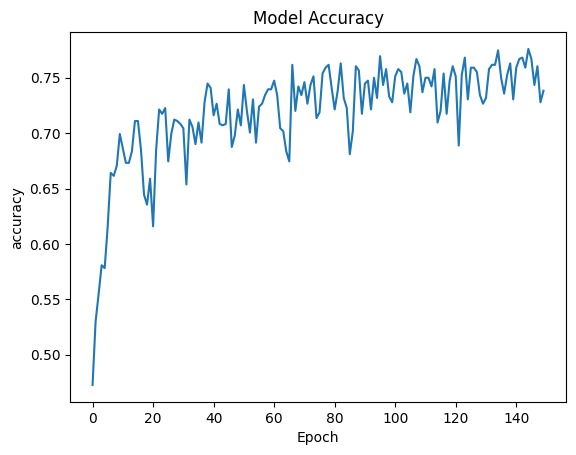

In [30]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

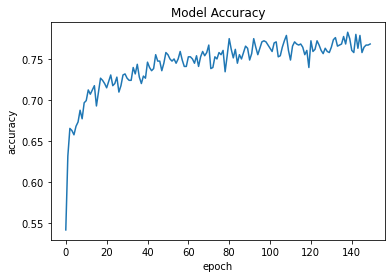

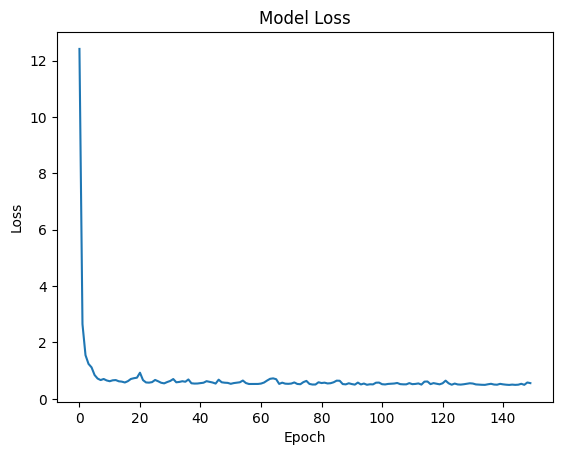

In [31]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

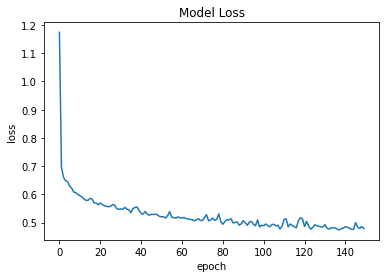

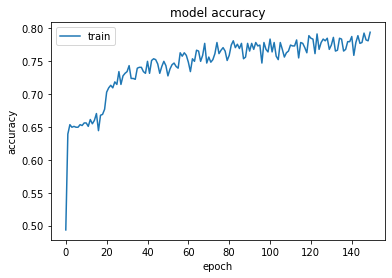

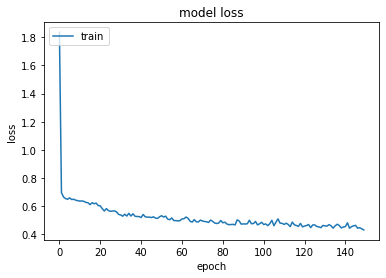

## `ii` Deep network


In [39]:
deeper_model = keras.Sequential()
deeper_model.add(Dense(12,activation='relu',input_shape=(X.shape[1],)))
deeper_model.add(Dense(8,activation='relu'))
deeper_model.add(Dense(1,activation='sigmoid'))

In [40]:
deeper_model.compile(optimizer=keras.optimizers.Adam(0.01), loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
h=deeper_model.fit(X,y,batch_size=32,epochs=150)

Epoch 1/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7240
Epoch 2/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7344
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.7057
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7422
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.7422
Epoch 6/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7096
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7266
Epoch 8/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.7240
Epoch 9/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.7214
Epoch 10/150
24/24 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.7279
Epoch 11/

Epoch 1/150
24/24 [==============================] - 0s 829us/step - loss: 15.8845 - accuracy: 0.5703
Epoch 2/150
24/24 [==============================] - 0s 724us/step - loss: 0.7539 - accuracy: 0.3451
Epoch 3/150
24/24 [==============================] - 0s 767us/step - loss: 0.6862 - accuracy: 0.6068
Epoch 4/150
24/24 [==============================] - 0s 741us/step - loss: 0.6688 - accuracy: 0.6510
Epoch 5/150
24/24 [==============================] - 0s 851us/step - loss: 0.6569 - accuracy: 0.6497
Epoch 6/150
24/24 [==============================] - 0s 866us/step - loss: 0.6497 - accuracy: 0.6562
Epoch 7/150
24/24 [==============================] - 0s 773us/step - loss: 0.6446 - accuracy: 0.6562
Epoch 8/150
24/24 [==============================] - 0s 809us/step - loss: 0.6387 - accuracy: 0.6589
Epoch 9/150
24/24 [==============================] - 0s 884us/step - loss: 0.6429 - accuracy: 0.6484
Epoch 10/150
24/24 [==============================] - 0s 888us/step - loss: 0.6342 - accur

In [50]:
deeper_accuracy =deeper_model.evaluate(X, y, verbose=0)[1]
print(f"Deeper Model Accuracy: {deeper_accuracy * 100:.2f}%")

Deeper Model Accuracy: 77.99%


24/24 [==============================] - 0s 912us/step - loss: 0.5965 - accuracy: 0.7044


[0.5965198874473572, 0.7044270634651184]

24/24 [==============================] - 0s 662us/step - loss: 0.5965 - accuracy: 0.7044
Accuracy: 70.44


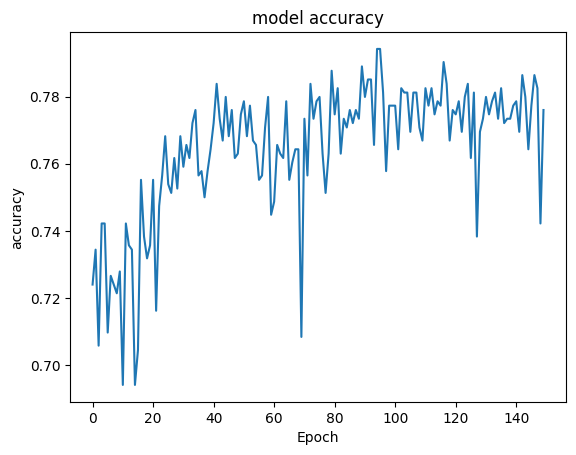

In [45]:
plt.plot(h.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

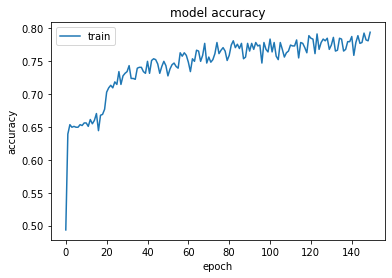

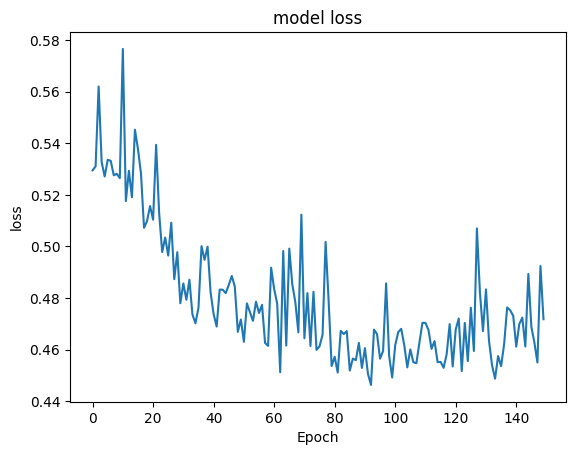

In [46]:
plt.plot(h.history['loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

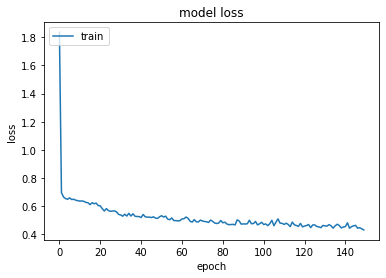

## `iii` Deeper network


In [47]:
more_deeper_model = keras.Sequential()
more_deeper_model.add(Dense(32,activation='relu',input_shape=(X.shape[1],)))
more_deeper_model.add(Dense(16,activation='relu'))
more_deeper_model.add(Dense(8,activation='relu'))
more_deeper_model.add(Dense(1,activation='sigmoid'))

In [48]:
more_deeper_model.compile(optimizer=keras.optimizers.Adam(0.01), loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
h1=more_deeper_model.fit(X,y,batch_size=32,epochs=150)

Epoch 1/150
24/24 [==============================] - 1s 1ms/step - loss: 0.8895 - accuracy: 0.6068
Epoch 2/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6338 - accuracy: 0.6536
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.6615
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6302
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.6510
Epoch 6/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.6497
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.6497
Epoch 8/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.6510
Epoch 9/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.6497
Epoch 10/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.6497
Epoch 11/

Epoch 1/150
24/24 [==============================] - 0s 781us/step - loss: 2.3439 - accuracy: 0.5586
Epoch 2/150
24/24 [==============================] - 0s 913us/step - loss: 0.6531 - accuracy: 0.6393
Epoch 3/150
24/24 [==============================] - 0s 808us/step - loss: 0.6537 - accuracy: 0.6667
Epoch 4/150
24/24 [==============================] - 0s 847us/step - loss: 0.6374 - accuracy: 0.6680
Epoch 5/150
24/24 [==============================] - 0s 889us/step - loss: 0.6274 - accuracy: 0.6732
Epoch 6/150
24/24 [==============================] - 0s 838us/step - loss: 0.5971 - accuracy: 0.7031
Epoch 7/150
24/24 [==============================] - 0s 783us/step - loss: 0.5790 - accuracy: 0.7096
Epoch 8/150
24/24 [==============================] - 0s 797us/step - loss: 0.5906 - accuracy: 0.6979
Epoch 9/150
24/24 [==============================] - 0s 898us/step - loss: 0.5797 - accuracy: 0.6979
Epoch 10/150
24/24 [==============================] - 0s 771us/step - loss: 0.5954 - accura

In [51]:
more_deeper_accuracy =more_deeper_model.evaluate(X, y, verbose=0)[1]
print(f"More Deeper Model Accuracy: {more_deeper_accuracy * 100:.2f}%")

More Deeper Model Accuracy: 78.12%


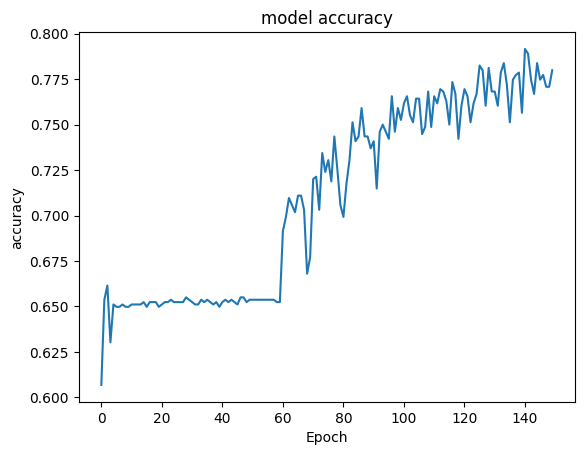

In [52]:
plt.plot(h1.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

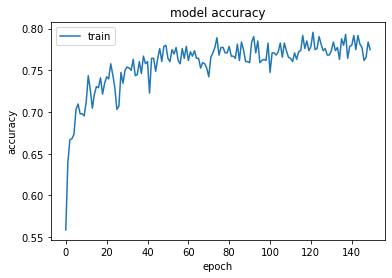

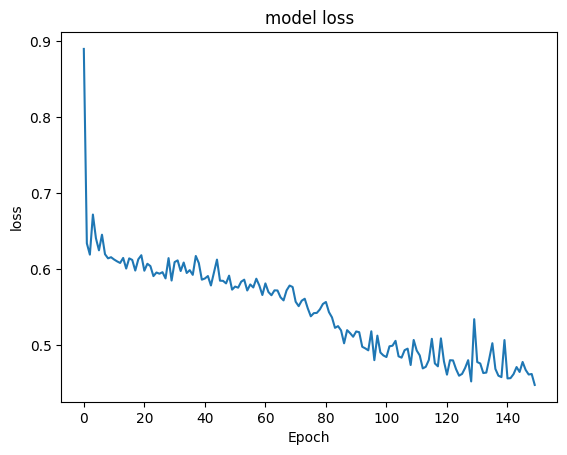

In [53]:
plt.plot(h1.history['loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

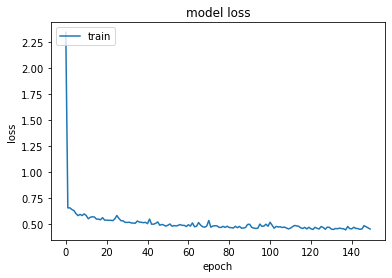

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$